In [1]:
from transformers import ViTImageProcessor, ViTModel
from qdrant_client import QdrantClient
from qdrant_client.http import models
from datasets import load_dataset
import numpy as np
import torch


In [2]:
client  = QdrantClient(host="localhost", port=6333)

In [3]:
my_collection = "image_collection"
client.recreate_collection(
    collection_name=my_collection,
    vectors_config=models.VectorParams(size=384, distance=models.Distance.COSINE)
)

True

## Image embeddings

In [4]:
dataset = load_dataset("marmal88/skin_cancer", split="train")
dataset

Dataset({
    features: ['image', 'image_id', 'lesion_id', 'dx', 'dx_type', 'age', 'sex', 'localization'],
    num_rows: 9577
})

In [5]:
dataset[8500]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450>,
 'image_id': 'ISIC_0025927',
 'lesion_id': 'HAM_0002557',
 'dx': 'melanoma',
 'dx_type': 'histo',
 'age': 50.0,
 'sex': 'female',
 'localization': 'upper extremity'}

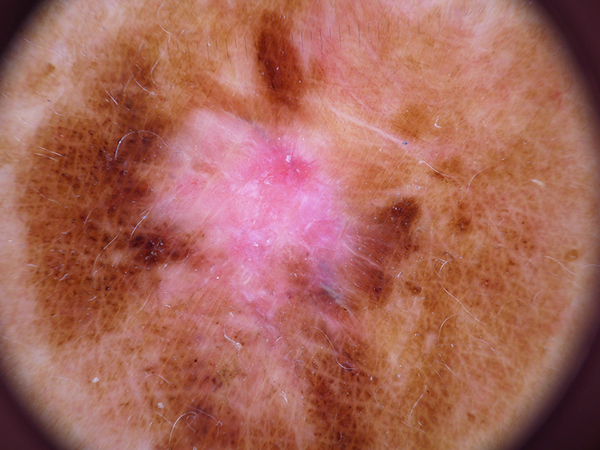

In [6]:
image = dataset[8500]["image"]
image

In [7]:
# Check that MPS is available
if not torch.backends.mps.is_available():
    if not torch.backends.mps.is_built():
        print("MPS not available because the current PyTorch install was not "
              "built with MPS enabled.")
    else:
        print("MPS not available because the current MacOS version is not 12.3+ "
              "and/or you do not have an MPS-enabled device on this machine.")

else:
    mps_device = torch.device("mps")

mps_device
mps_device = torch.device("cpu")
mps_device

device(type='cpu')

In [8]:
processor = ViTImageProcessor.from_pretrained("facebook/dino-vits16")
model = ViTModel.from_pretrained("facebook/dino-vits16").to(mps_device)

Some weights of ViTModel were not initialized from the model checkpoint at facebook/dino-vits16 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
type(image)
inputs = processor(images=image, return_tensor="pt").to(mps_device)
# inputs["pixel_values"].shape, inputs

> /Users/zero/projects/python_venvs/.venvDS/lib/python3.11/site-packages/transformers/feature_extraction_utils.py(230)to()
    228             # check if v is a floating point
    229             __import__("pdb").set_trace()
--> 230             if torch.is_floating_point(v):
    231                 # cast and send to device
    232                 new_data[k] = v.to(*args, **kwargs)



ipdb>  v


[array([[[-1.3986644, -1.4329139, -1.4500387, ..., -1.0904187,
         -1.1075436, -1.0904187],
        [-1.4157891, -1.4329139, -1.4500387, ..., -1.0904187,
         -1.1075436, -1.1075436],
        [-1.4329139, -1.4500387, -1.4500387, ..., -1.1246684,
         -1.1075436, -1.1075436],
        ...,
        [-1.1075436, -1.1075436, -1.0904187, ..., -1.4842881,
         -1.5014129, -1.5356624],
        [-1.1075436, -1.1075436, -1.0904187, ..., -1.4842881,
         -1.5185376, -1.5527872],
        [-1.1246684, -1.1246684, -1.0904187, ..., -1.4842881,
         -1.5356624, -1.5527872]],

       [[-1.7380952, -1.7380952, -1.7556022, ..., -1.5980392,
         -1.6155462, -1.6330532],
        [-1.7380952, -1.7380952, -1.7556022, ..., -1.6155462,
         -1.6330532, -1.6505601],
        [-1.7380952, -1.7380952, -1.7556022, ..., -1.5980392,
         -1.6155462, -1.6155462],
        ...,
        [-1.5630252, -1.5630252, -1.5630252, ..., -1.7731092,
         -1.7906162, -1.7906162],
        [-1

ipdb>  v_tense = tf.convert_to_tensor(v)


*** NameError: name 'tf' is not defined


ipdb>  import tensorflow as tf


*** ModuleNotFoundError: No module named 'tensorflow'


ipdb>  torch


<module 'torch' from '/Users/zero/projects/python_venvs/.venvDS/lib/python3.11/site-packages/torch/__init__.py'>


ipdb>  v_tense = torch.from_numpy(v)


*** TypeError: expected np.ndarray (got list)


ipdb>  type(v)


<class 'list'>


ipdb>  v_tense = torch.from_numpy(v[0])
ipdb>  torch.is_floating_point(v[0])


*** TypeError: is_floating_point(): argument 'input' (position 1) must be Tensor, not numpy.ndarray


ipdb>  torch.is_floating_point(torch.from_numpy(v[0]))


True


ipdb>  c


TypeError: is_floating_point(): argument 'input' (position 1) must be Tensor, not list